1000


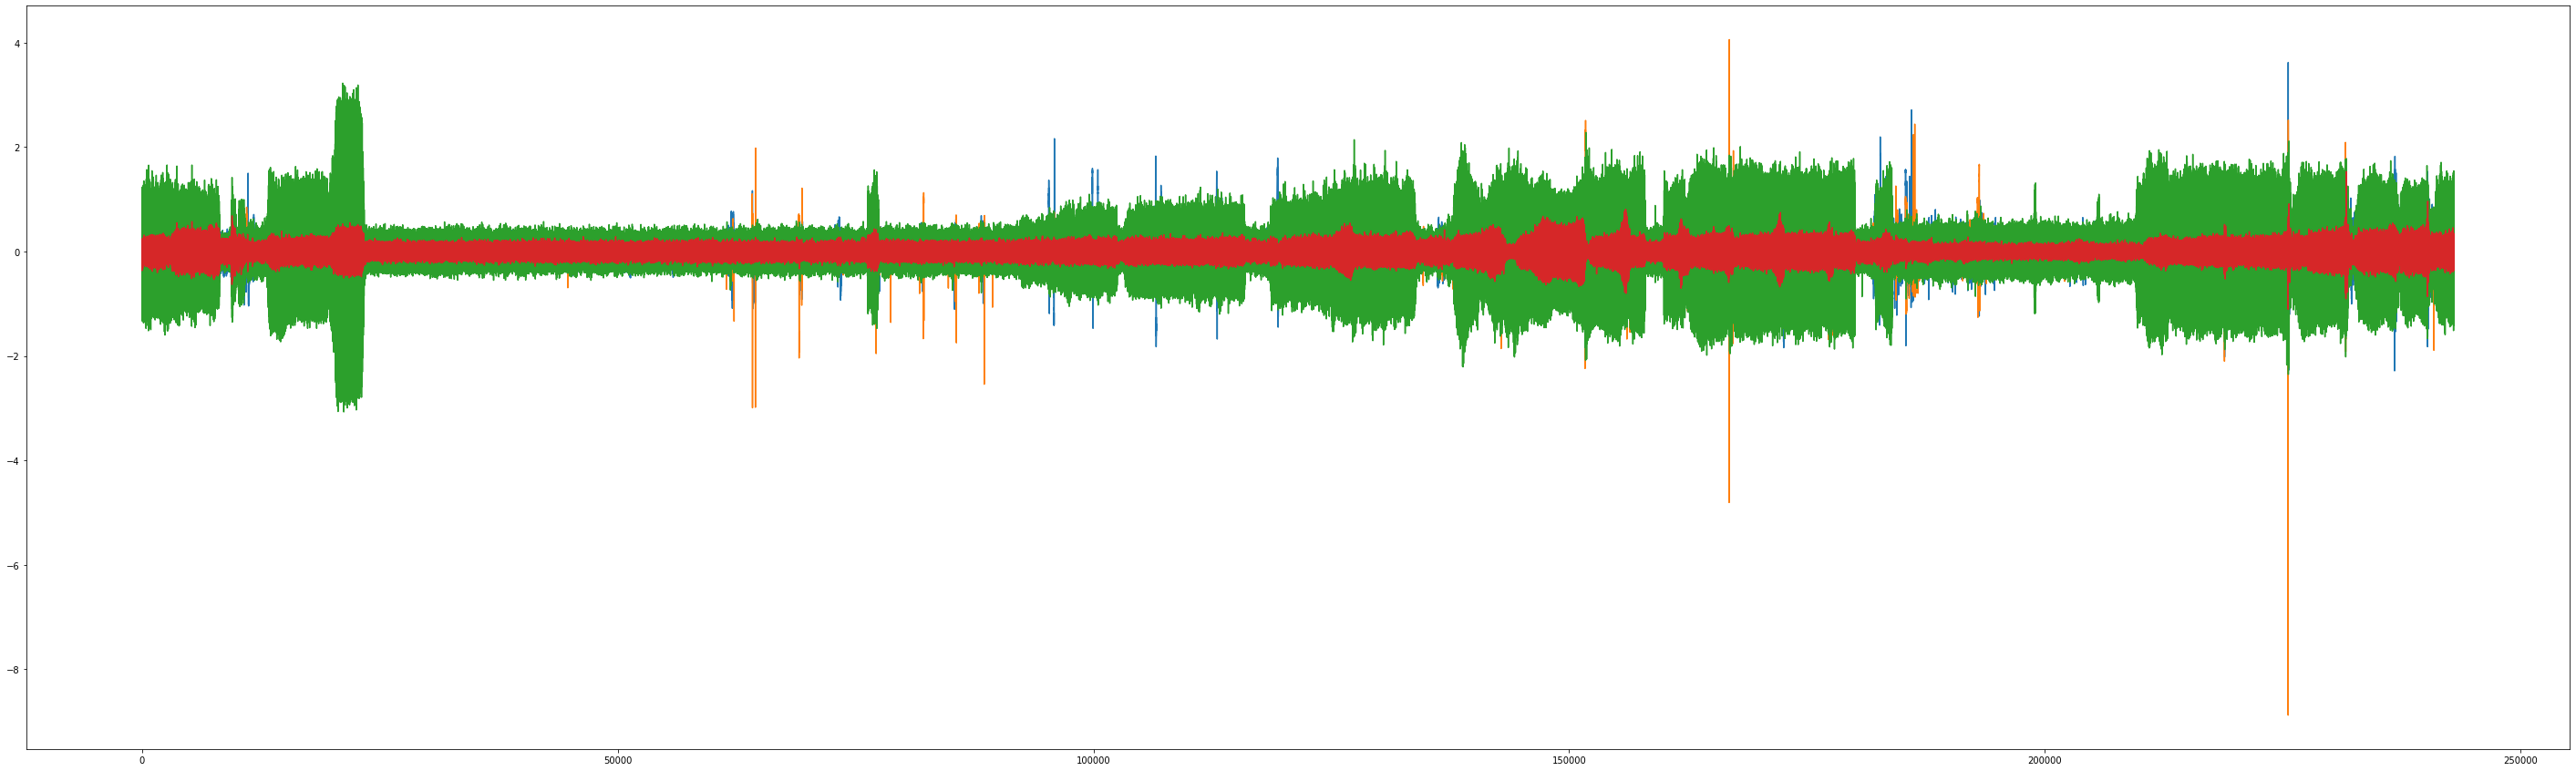

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# load pv data for continuous_1
path = '../dataset/pv/20230309/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=243
ms=False
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
pv_det = seasonal_decompose(pv, model='additive', period=75, extrapolate_trend='freq')
pv_denoised = pv-pv_det.trend
# print(pv_denoised.shape)
print(fs)

fig = plt.figure(figsize=[50, 15])
plt.plot(pv_denoised)

[]
0
1
2
3
(487,)
(501, 487)


(1, 50)

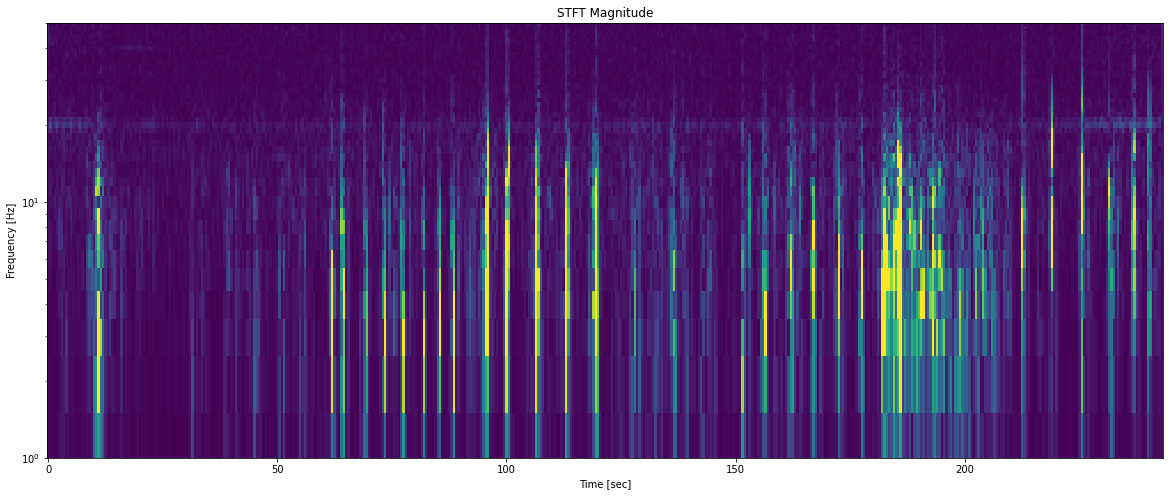

In [2]:
from scipy import signal

continuous_1=[]
print(continuous_1)
for ii in range(pv.shape[1]):
    print(ii)
# perform fft on pv data with window length of 0.1s
    f, t, Zxx = signal.stft(pv_denoised[:,ii], fs, nperseg=1000, axis=-1)
    continuous_1.append(Zxx)

print(np.shape(t))
print(continuous_1[1].shape)
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()
# ax.set_xlim(0, 4860)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# print(f)
# print(fs)
plt.pcolormesh(t, f, np.abs(continuous_1[0]),vmax=0.1,vmin=0)
plt.yscale('log')
plt.ylim(1, 50)
# ax.imshow(np.abs(continuous_1[0]),vmax=0.05,vmin=0,interpolation='nearest',aspect='auto',extent=(np.max(np.abs(continuous_1[0])),np.min(np.abs(continuous_1[0])),np.max(f),np.min(f)))

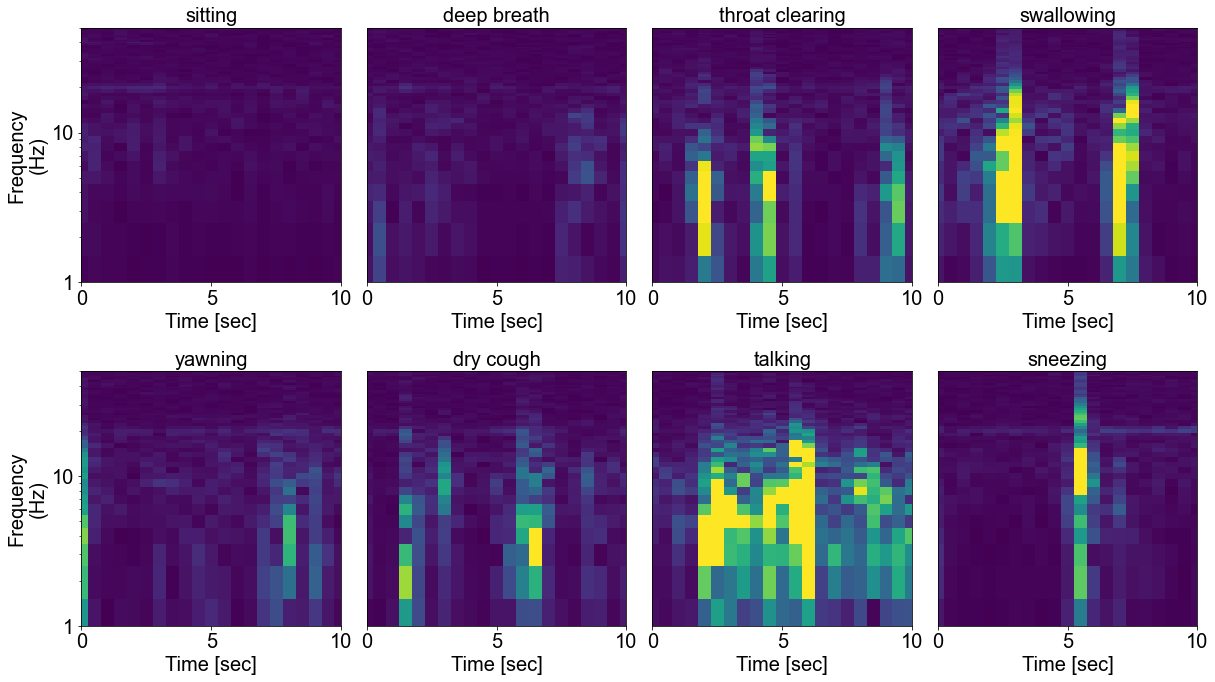

In [3]:
font = {'family': 'arial',
        'weight': 'normal',
        'size': 20,
        }

labels = ['sitting',
          'deep breath',
          'throat clearing',
          'swallowing',
          'yawning',
          'dry cough',
          'talking',
          'sneezing']
left_borders = np.array([20, 31, 60, 93, 120, 150, 180, 220])
right_borders = left_borders+10

fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)

for i,(l,r) in enumerate(zip(left_borders, right_borders)):
    axes[i//4,i-i//4*4].pcolormesh(t, f, np.abs(continuous_1[0]),vmax=0.1,vmin=0)
    axes[i//4,i-i//4*4].set_xlim(l,r)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([l,(l+r)/2,r])
    axes[i//4,i-i//4*4].set_xticklabels([0,5,10],fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

In [4]:
path = '../dataset/orientation/20230309/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=243
ms=True
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
orientation = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)

[]
0
1
2
(463,)
(51, 463)


(1, 50)

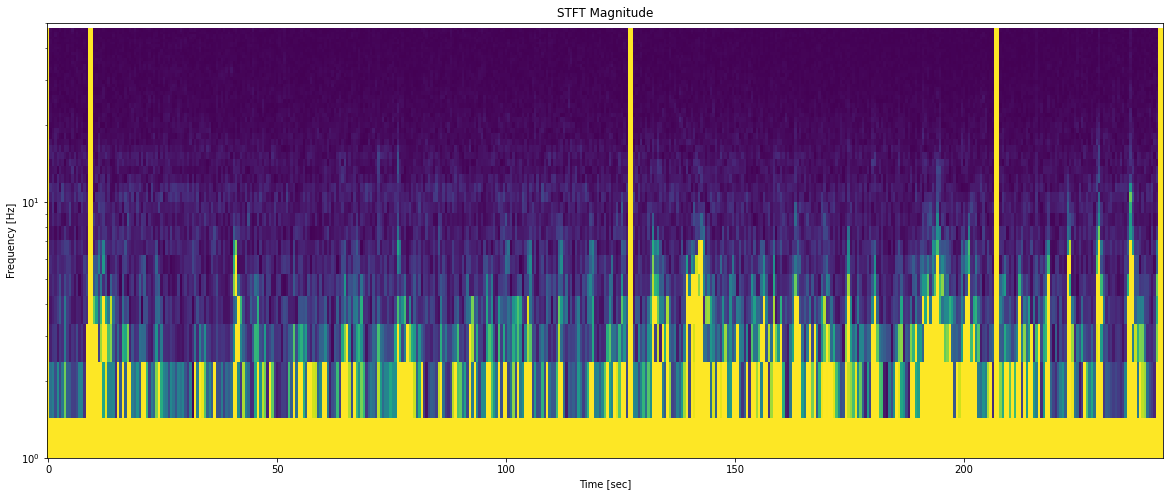

In [5]:
orientation_1=[]
print(orientation_1)
for ii in range(orientation.shape[1]):
    print(ii)
# perform fft on pv data with window length of 0.1s
    f, t, Zxx = signal.stft(orientation[:,ii], fs, nperseg=100, axis=-1)
    orientation_1.append(Zxx)

print(np.shape(t))
print(orientation_1[1].shape)
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()
# ax.set_xlim(0, 4860)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# print(f)
# print(fs)
plt.pcolormesh(t, f, np.abs(orientation_1[0]),vmax=0.1,vmin=0)
plt.yscale('log')
plt.ylim(1, 50)

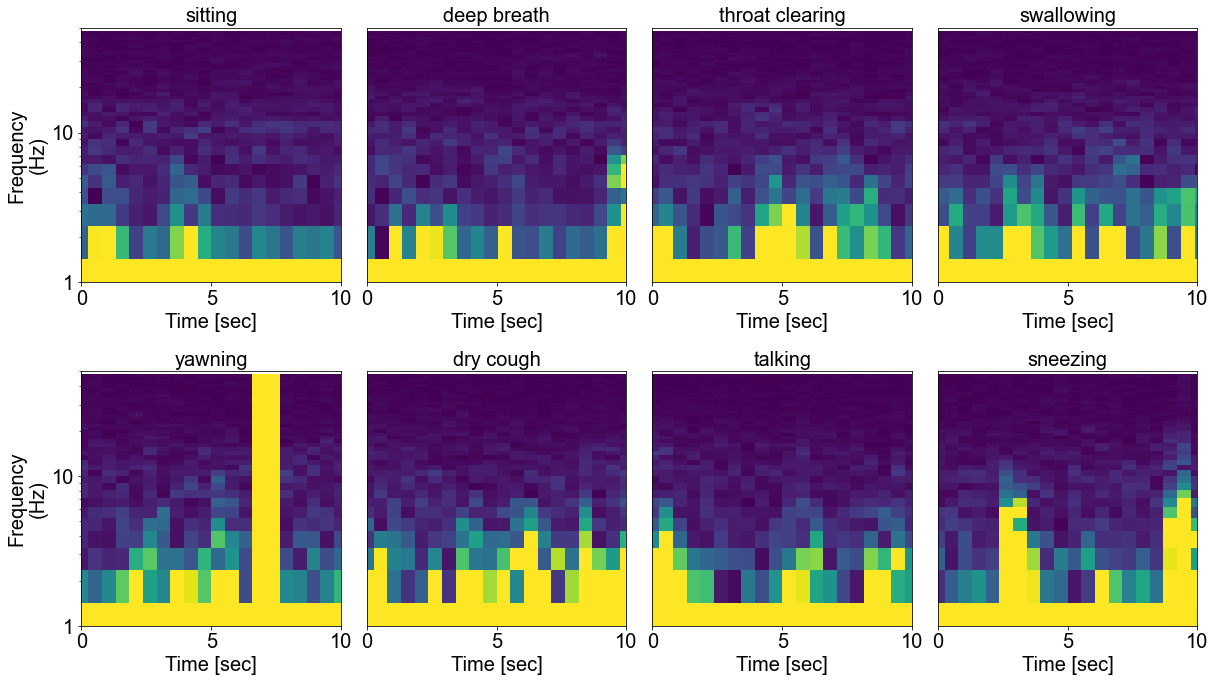

In [6]:
fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)

for i,(l,r) in enumerate(zip(left_borders, right_borders)):
    axes[i//4,i-i//4*4].pcolormesh(t, f, np.abs(orientation_1[0]),vmax=0.1,vmin=0)
    axes[i//4,i-i//4*4].set_xlim(l,r)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([l,(l+r)/2,r])
    axes[i//4,i-i//4*4].set_xticklabels([0,5,10],fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

In [7]:
path = '../dataset/pv/20230309/continuous_2.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=243
ms=False
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
pv_det = seasonal_decompose(pv, model='additive', period=75, extrapolate_trend='freq')
pv_denoised = pv-pv_det.trend

[]
0
1
2
3
(487,)
(501, 487)


(1, 50)

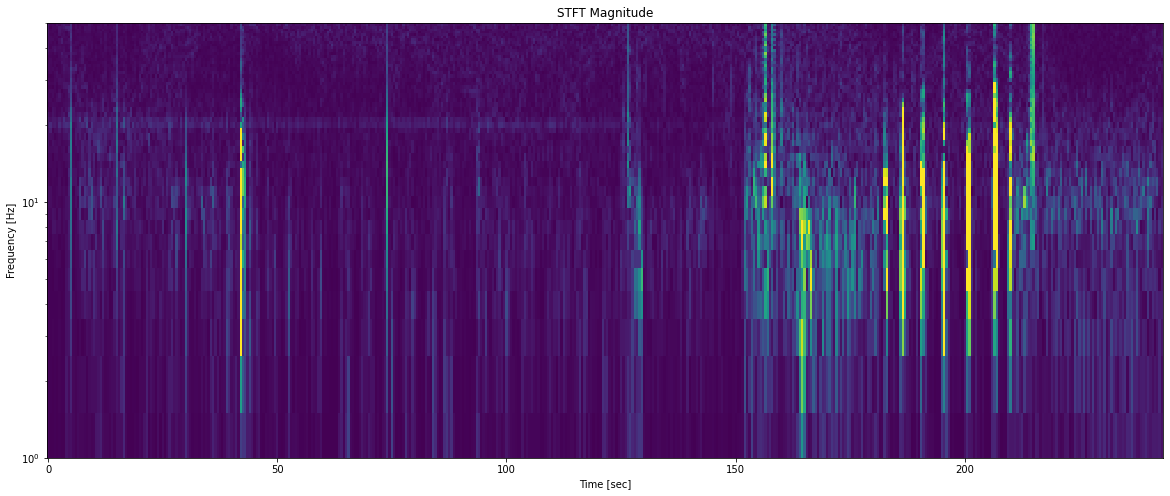

In [9]:
continuous_2=[]
print(continuous_2)
for ii in range(pv.shape[1]):
    print(ii)
# perform fft on pv data with window length of 0.1s
    f, t, Zxx = signal.stft(pv_denoised[:,ii], fs, nperseg=1000, axis=-1)
    continuous_2.append(Zxx)

print(np.shape(t))
print(continuous_2[1].shape)
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()
# ax.set_xlim(0, 4860)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# print(f)
# print(fs)
plt.pcolormesh(t, f, np.abs(continuous_2[0]),vmax=0.1,vmin=0)
plt.yscale('log')
plt.ylim(1, 50)

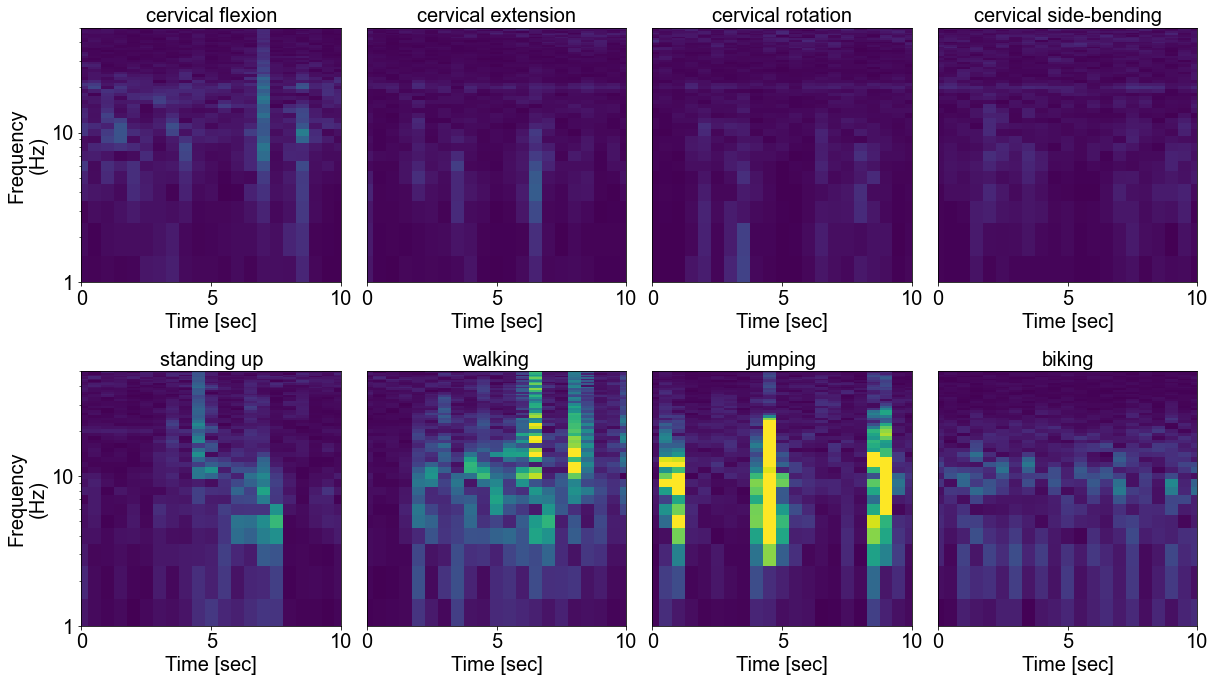

In [10]:
left_borders = np.array([8, 46, 62, 102, 122, 150, 182, 223])
right_borders = left_borders+10

labels = ['cervical flexion',
          'cervical extension',
          'cervical rotation',
          'cervical side-bending',
          'standing up',
          'walking',
          'jumping',
          'biking']

fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)

for i,(l,r) in enumerate(zip(left_borders, right_borders)):
    axes[i//4,i-i//4*4].pcolormesh(t, f, np.abs(continuous_2[0]),vmax=0.1,vmin=0)
    axes[i//4,i-i//4*4].set_xlim(l,r)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([l,(l+r)/2,r])
    axes[i//4,i-i//4*4].set_xticklabels([0,5,10],fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

In [11]:
path = '../dataset/orientation/20230309/continuous_2.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=243
ms=True
# data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
orientation = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)

[]
0
1
2
(487,)
(51, 487)


(1, 50)

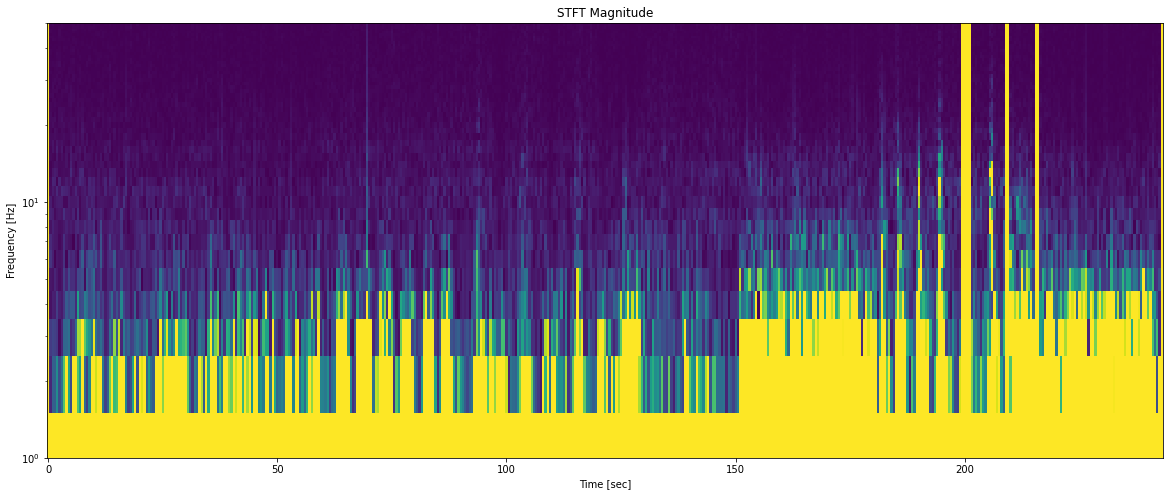

In [13]:
orientation_2=[]
print(orientation_2)
for ii in range(orientation.shape[1]):
    print(ii)
# perform fft on pv data with window length of 0.1s
    f, t, Zxx = signal.stft(orientation[:,ii], fs, nperseg=100, axis=-1)
    orientation_2.append(Zxx)

print(np.shape(t))
print(orientation_2[1].shape)
fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()
# ax.set_xlim(0, 4860)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# print(f)
# print(fs)
plt.pcolormesh(t, f, np.abs(orientation_2[0]),vmax=0.1,vmin=0)
plt.yscale('log')
plt.ylim(1, 50)

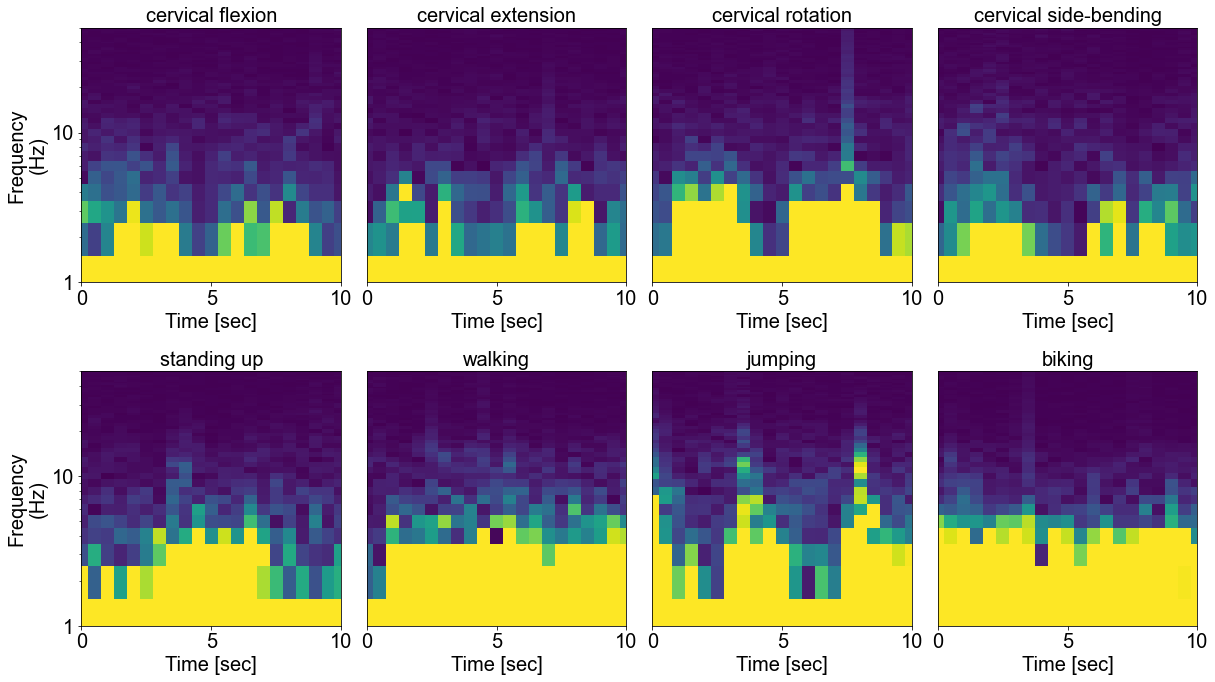

In [15]:
fig, axes = plt.subplots(nrows=2,
                         ncols=4)
fig.set_size_inches(20, 11)
fig.subplots_adjust(hspace=0.35, wspace=0.1)

for i,(l,r) in enumerate(zip(left_borders, right_borders)):
    axes[i//4,i-i//4*4].pcolormesh(t, f, np.abs(orientation_2[0]),vmax=0.1,vmin=0)
    axes[i//4,i-i//4*4].set_xlim(l,r)
    axes[i//4,i-i//4*4].set_title(labels[i], fontdict=font)
    axes[i//4,i-i//4*4].set_xticks([l,(l+r)/2,r])
    axes[i//4,i-i//4*4].set_xticklabels([0,5,10],fontdict=font)
    axes[i//4,i-i//4*4].set_xlabel('Time [sec]',fontdict=font)
    axes[i//4,i-i//4*4].set_ylim(1, 50)
    axes[i//4,i-i//4*4].set_yscale('log')
    if i%4==0:
        axes[i//4,i-i//4*4].set_ylabel('Frequency\n(Hz)', fontdict=font)
        axes[i//4,i-i//4*4].set_yscale('log')
        axes[i//4,i-i//4*4].set_yticks([1,10])
        axes[i//4,i-i//4*4].set_yticklabels([1,10], fontdict=font)
    else:
        axes[i//4,i-i//4*4].get_yaxis().set_visible(False)

plt.show()

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
in_channels = 2
out_channels = 3
kernel_size = 2
conv = nn.Conv2d(in_channels, out_channels, kernel_size)

# conv = nn.Conv2d(2, 3, 2)

'''input of size [N,C,H, W]
N==>batch size,
C==> number of channels,
H==> height of input planes in pixels,
W==> width in pixels.
'''

# define the input with below info
N=2
C=2
H=4
W=4
input = torch.empty(N,C,H,W).random_(256)
print("Input Tensor:", input)
print("Input Size:",input.size())

# Perform convolution operation
output = conv(input)
print("Output Tensor:", output)
print("Output Size:",output.size())

# With square kernels (2,2) and equal stride
conv = nn.Conv2d(2, 3, 2, stride=2)
output = conv(input)
print("Output Size:",output.size())

# non-square kernels and unequal stride and with padding
conv = nn.Conv2d(2, 3, (2, 3), stride=(2, 1), padding=(2, 1))
output = conv(input)
print("Output Size:",output.size())

# non-square kernels and unequal stride and with padding and dilation
conv = nn.Conv2d(2, 3, (2, 3), stride=(2, 1), padding=(2, 1),
dilation=(2, 1))
output = conv(input)
print("Output Size:",output.size())